# Caso Aplicado



![image info](images/logo_terremoto.png )


EL dataset `terremotos.csv` contiene la información de los terremotos de los países durante el año 2000 al 2011. Debido a que la información de este dataset es relativamente fácil de trabajar, hemos creado un dataset denominado `terremotos_contaminados.csv` que posee información contaminada en cada una de sus columnas. De esta forma se podrá ilustrar los distintos inconvenientes que se puede tener en el análisis exploratorio de datos.

## Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **País**: 
    * Descripción: País del evento sísmico. 
    * Tipo de dato: *string*
    * Limitantes: No pueden haber nombre de ciudades, comunas o pueblos.
* **Año**: 
    * Descripción: Año del evento sísmico. 
    * Tipo de dato: *integer*. 
    * Limitantes: el año debe estar entre al año 2000 y 2011.
* **Magnitud**: 
    * Descripción: Magnitud del evento sísmico. 
    * Tipo de dato: *float*. 
    * Limitantes: la magnitud puede estar entre 5 y 9.6. 


 **¿ Por qué no puede ser un terremoto con una intensidad mayor a 9.6?**. Esto se debe a que el terremoto con mayor magnitud registrado por la humanidad es de 9.6, ocurrido en Chile (Valdivia) durante el año 1960. Por lo tanto, entre mayor conocimiento se tenga del fenómeno en estudio, más restrictivo se vulve el análisis exploratorio y más sentido tienen los resultados obtenidos.




## Conjunto de datos

El conjunto de datos consta de cuatro columnas:
 * País
 * Año
 * Magnitud
 * Información
 




## Checklist del experimento

Dado que conocemos el fenómeno en estudio, vayamos realizando un checklist de los procesos para hacer un correcto EDA.

**1. ¿ Qué pregunta (s) estás tratando de resolver (o probar que estás equivocado)?**

El objetivo es encontrar el terremoto de mayor magnitud por país en los distintos años.


**2. ¿ Qué tipo de datos tienes ?**

Los tipos de variables que tiene el conjunto de datos son:

* Categóricas: País, Información.
* Numéricas: Año, Magnitud.


![image info](images/categorias.png )



In [1]:
# cargar librerias

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
terremotos_data = pd.read_csv(os.path.join("data","terremotos_contaminados.csv"), sep=",")
terremotos_data.head()

,Año,Pais,Magnitud,Informacion
0,2000,Turkey,6,info no valiosa
1,2000,Turkmenistan,7,info no valiosa
2,2000,Azerbaijan,6.5,info no valiosa
3,2000,Azerbaijan,6.8,info no valiosa
4,2000,Papua New Guinea,8,info no valiosa


In [3]:
# normalizar columnas (minusculas y sin espacios)

terremotos_data.columns = terremotos_data.columns.str.lower().str.strip()
terremotos_data.head()

,año,pais,magnitud,informacion
0,2000,Turkey,6,info no valiosa
1,2000,Turkmenistan,7,info no valiosa
2,2000,Azerbaijan,6.5,info no valiosa
3,2000,Azerbaijan,6.8,info no valiosa
4,2000,Papua New Guinea,8,info no valiosa


In [4]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [5]:
frames = []

for col in terremotos_data.columns:
    aux_df = resumen_por_columna(terremotos_data,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(terremotos_data)
df_info

,columna,unicos,vacios,% vacios
0,año,17,2,0.008772
1,pais,75,2,0.008772
2,magnitud,46,3,0.013158
3,informacion,4,8,0.035088


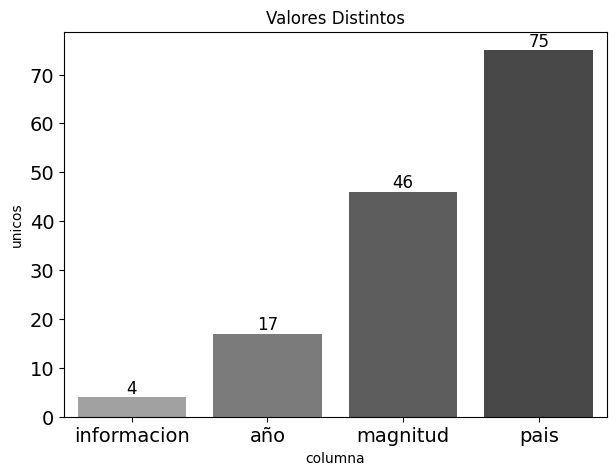

In [6]:
plt.style.use('default')
plt.figure(figsize=(7,5))

plotting = sns.barplot(
    x="columna",
    y="unicos",
    data=df_info.sort_values('unicos'),
    palette="Greys_d",
    linewidth=3
)

for container in plotting.containers:
    plotting.bar_label(container,fontsize=12)

plt.title("Valores Distintos")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

**¿Qué falta en los datos y cómo los maneja?**

En este caso, se tiene la información suficiente para poder realizar el experimento, solo falta ver que los datos de la muestra no esten lo suficientemente contaminados.

**¿Qué hacer con los datos faltantes, outliers o información mal inputada?**

Este caso es más interesante, y se necesita ir detallando columna por columna los distintos análisis. 

### Columna: Año
Los años distintos en la muestra son:



In [7]:
terremotos_data['año'].unique()

array(['2000', '2001', 'dos mil uno', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '1997', '1990',
       '1999', nan], dtype=object)

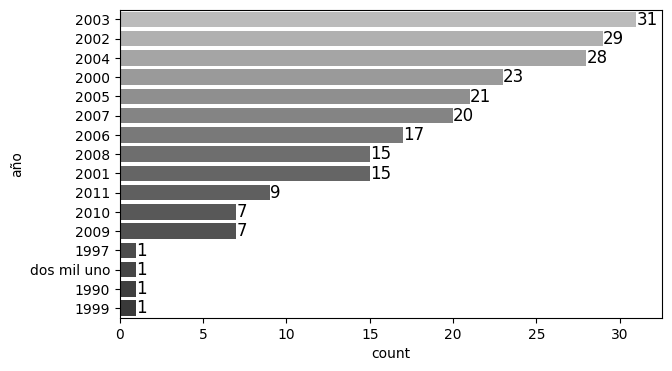

In [8]:
# bar plot: año

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="año",
    data=terremotos_data,
    order=terremotos_data['año'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)

for container in plotting.containers:
    plotting.bar_label(container,fontsize=12)


plt.show()

Se presentan las siguientes anomalidades:

* **Años sin importancia**: Se ha establecido que los años de estudios son desde el año 2000 al 2011.
* **Nombres mal escritos**: en este caso sabemos que 'dos mil uno' corresponde a '2001'.
* **Datos vacío**

Ahora la pregunta es, ¿ qué debemos hacer primero?. Lo primero es corregir la información, dar un formato estándar a los datos y luego filtrar.

**a) Corrección**

In [9]:
terremotos_data.loc[terremotos_data['año']=='dos mil uno','año'] = '2001'
terremotos_data.loc[terremotos_data['año'].isnull(),'año'] = '0'

terremotos_data['año'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '1997', '1990', '1999', '0'],
      dtype=object)

**b) Formato**

El formato de los años es *integer*, por lo tanto se le debe dar ese formato.

In [10]:
terremotos_data['año'] = terremotos_data['año'].astype(int)

**c) Filtro**

Se ha establecido que los años de estudios son desde el año 2000 al 2011, por lo tanto los años en estudios deberian ser:


In [11]:
anios_estudio = [x for x in range(2000,2011+1)]
print(anios_estudio)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


Por lo tanto ya tenemo nuestro primer filtro:

In [12]:
mask_anio = terremotos_data['año'].isin(anios_estudio)

### Columna: País

Los paises distintos en la muestra son:


In [13]:
set(terremotos_data['pais'].unique())

{'Afghanistan',
 'Afghanistan ',
 'Algeria',
 'Algeria ',
 'Argentina',
 'Azerbaijan',
 'Azerbaijan ',
 'Bangladesh',
 'Burma ',
 'Chile',
 'Chile ',
 'China',
 'China ',
 'Colombia',
 'Costa Rica',
 'Costa Rica ',
 'Democratic Republic of the Congo',
 'Democratic Republic of the Congo ',
 'Dominican Republic',
 'Ecuador',
 'El Salvador ',
 'Greece',
 'Greece ',
 'Guadeloupe',
 'Guatemala',
 'Haiti ',
 'India',
 'India ',
 'Indonesia',
 'Indonesia ',
 'Iran',
 'Iran ',
 'Iran, 2005 Qeshm earthquake',
 'Italy',
 'Italy ',
 'Japan',
 'Japan ',
 'Kazakhstan',
 'Kyrgyzstan ',
 'Martinique',
 'Mexico ',
 'Morocco',
 'Morocco ',
 'Mozambique',
 'New Zealand',
 'New Zealand ',
 'Nicaragua',
 'Pakistan',
 'Pakistan ',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru ',
 'Philippines',
 'Russian Federation',
 'Rwanda',
 'Samoa ',
 'Serbia',
 'Slovenia',
 'Solomon Islands ',
 'Taiwan',
 'Taiwan ',
 'Tajikistan',
 'Tajikistan ',
 'Tanzania',
 'Tanzania ',
 'Turkey',
 'Turkey ',
 'Turkmenistan',
 '

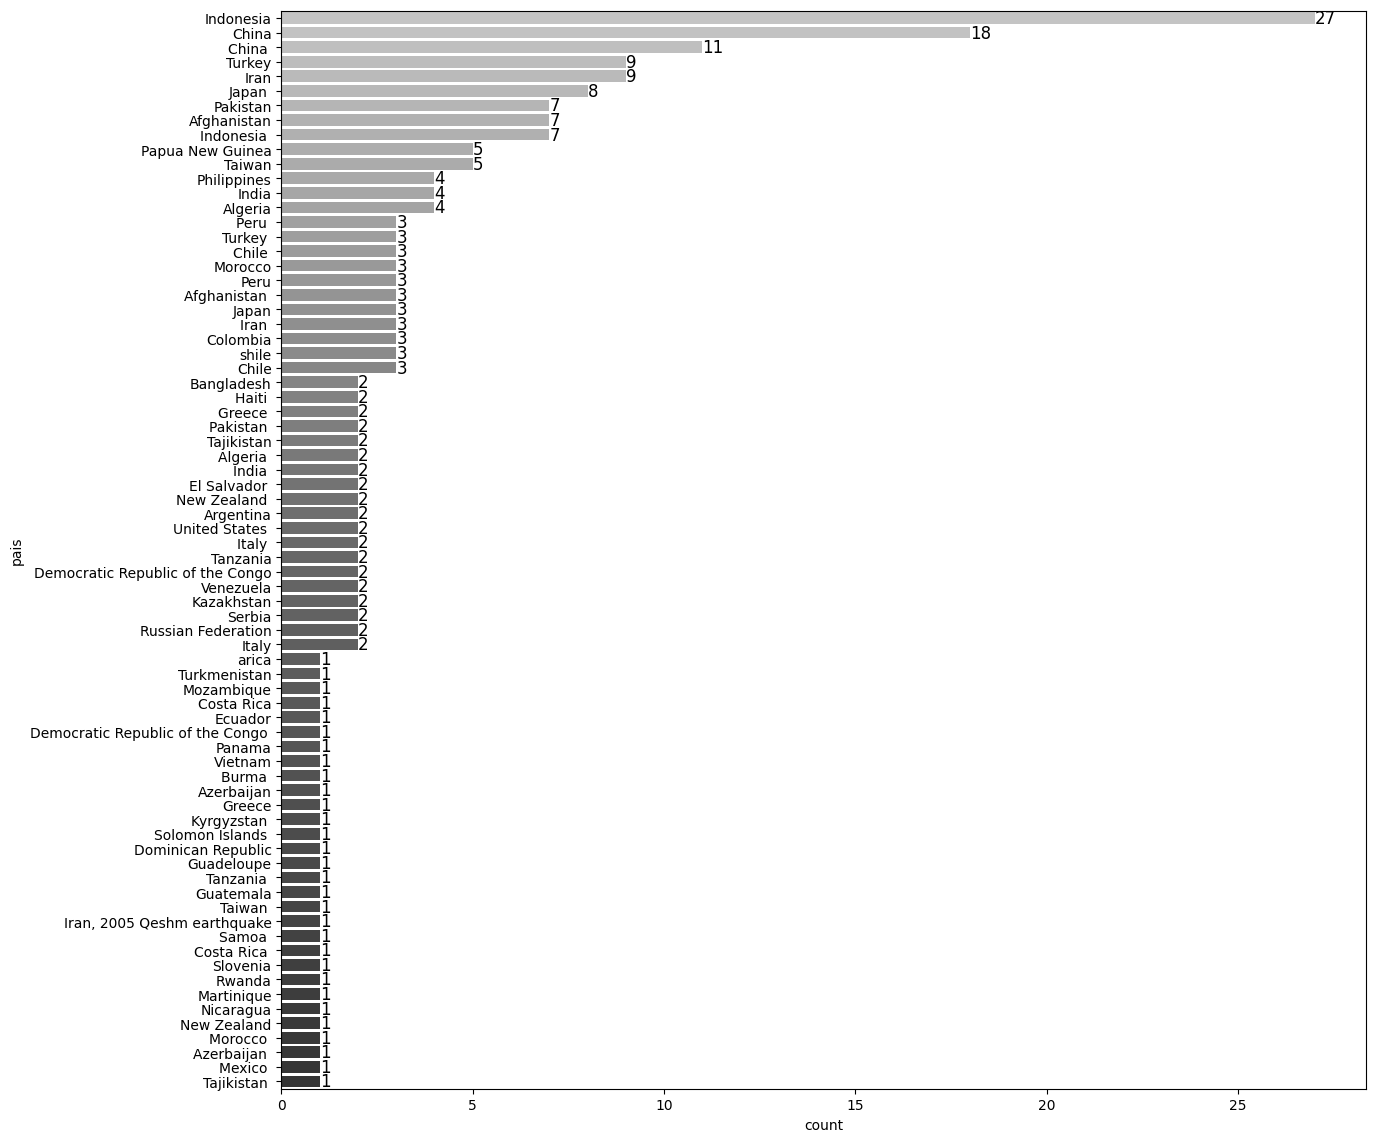

In [14]:
# bar plot: pais

plt.style.use('default')
plt.figure(figsize=(14,14))

plotting = sns.countplot(
    y="pais",
    data=terremotos_data,
    order=terremotos_data.pais.value_counts().index,
    palette="Greys_d",
    linewidth=3
)

for container in plotting.containers:
    plotting.bar_label(container,fontsize=12)


plt.show()

Se presentan las siguientes anomalidades:

* **Formato de los nombres**: no se le ha aplicado *strip()* y *lower()*, por lo cual tenemos casos como: 'Turkey' y 'Turkey ' como elementos diferentes.
* **Nombres mal escritos**: en este caso sabemos que 'shile' corresponde a 'Chile' e 'Iran, 2005 Qeshm earthquake' corrsponde a 'Iran'.
* **Datos vacío**


Se solucionará cada uno de estos inconvenientes:

**Corrección de los nombres**



In [15]:
terremotos_data.loc[terremotos_data['pais']=='arica','pais'] = 'chile'
terremotos_data.loc[terremotos_data['pais']=='shile','pais'] = 'chile'
terremotos_data.loc[terremotos_data['pais']=='Iran, 2005 Qeshm earthquake','pais'] = 'iran'
terremotos_data.loc[terremotos_data['pais'].isnull(),'pais'] = 'sin_nombre'

**Formato**

In [16]:
# correccion formato de nombre 
terremotos_data['pais'] = terremotos_data['pais'].str.lower().str.strip()

**Filtro**

In [17]:
mask_pais = terremotos_data['pais']!='sin_nombre'

### Columna: Magnitud

Las magnitudes distintas en la muestra son:


In [18]:
terremotos_data['magnitud'].unique()

array(['6', '7', '6.5', '6.8', '8', '5.7', '6.4', '5.5', '6.3', '5.4',
       '6.1', '6.7', '7.9', '7.2', '7.5', '5.3', '5.9', '9.7', '5.8',
       '4.7', '7.6', '8.4', '5', '5.6', '6.6', '6.2', '7.1', '7.3', '5.1',
       '5.2', '8.3', '6.9', '9.1', '4.9', '7.8', '8.6', '7.7', '7.4',
       '8.5', '8.1', '8.8', '9', '-10', nan, '2002-Tanzania-5.8',
       '2003-japan-8.5'], dtype=object)

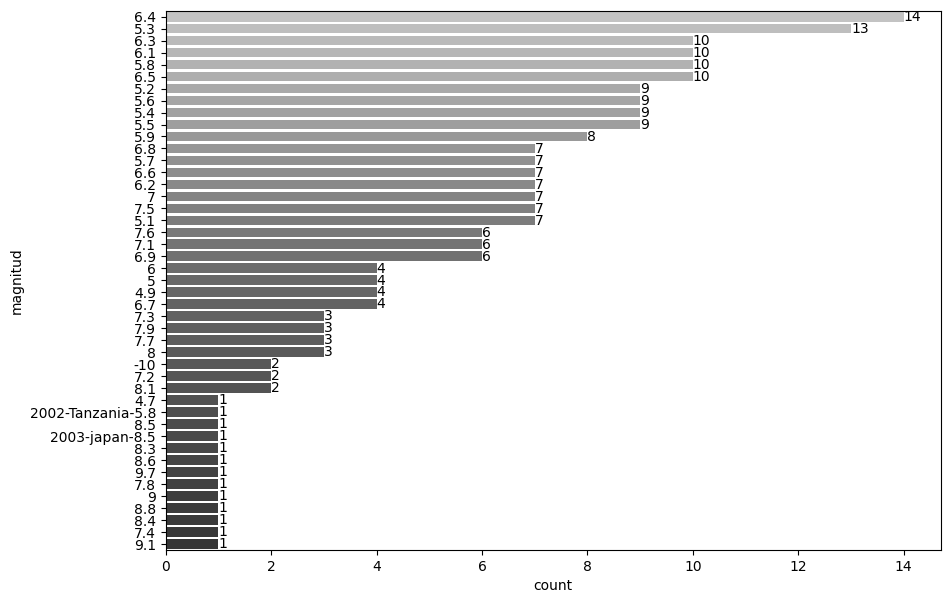

In [19]:
# bar plot: magnitud

plt.style.use('default')
plt.figure(figsize=(10,7))

plotting = sns.countplot(
    y="magnitud",
    data=terremotos_data,
    order=terremotos_data['magnitud'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)

for container in plotting.containers:
    plotting.bar_label(container,fontsize=10)


plt.show()

Se presentan las siguientes anomalidades:

* **Magnitudes sin importancia**: Se ha establecido que las magnitudes de un terremoto son de 5 a 9.6.
* **Datos con información comprimida**: Debido a una inputación incorrecta de los datos o a una mala lectura, la información se concentra en una celda.
* **Datos vacío**

**Corrección de las magnitudes**

In [20]:
# caso: tradicional
terremotos_data.loc[terremotos_data['magnitud']=='2002-Tanzania-5.8','magnitud'] = '0'
terremotos_data.loc[terremotos_data['magnitud']=='2003-japan-8.5','magnitud'] = '0'
terremotos_data.loc[terremotos_data['magnitud'].isnull(),'magnitud'] = '0'

In [21]:
# caso: informacion comprimida
terremotos_data.loc[-1] = [2002,'tanzania','5.8','-']
terremotos_data.loc[-2] = [2003,'japan','8.5','-']

In [22]:
terremotos_data = terremotos_data.reset_index(drop=True)
terremotos_data.tail()

,año,pais,magnitud,informacion
225,0,sin_nombre,0,NaN
226,0,sin_nombre,0,NaN
227,2005,chile,8,valiosa
228,2002,tanzania,5.8,-
229,2003,japan,8.5,-


**Corrección formato de las magnitudes**

In [23]:
terremotos_data['magnitud'] = terremotos_data['magnitud'].astype(float)
terremotos_data['magnitud'].unique()

array([  6. ,   7. ,   6.5,   6.8,   8. ,   5.7,   6.4,   5.5,   6.3,
         5.4,   6.1,   6.7,   7.9,   7.2,   7.5,   5.3,   5.9,   9.7,
         5.8,   4.7,   7.6,   8.4,   5. ,   5.6,   6.6,   6.2,   7.1,
         7.3,   5.1,   5.2,   8.3,   6.9,   9.1,   4.9,   7.8,   8.6,
         7.7,   7.4,   8.5,   8.1,   8.8,   9. , -10. ,   0. ])

**c) Filtro de las magnitudes**

In [24]:
mask_mag_inf =  terremotos_data['magnitud']>=5
mask_mag_sup =  terremotos_data['magnitud']<=9.6

mask_mag = mask_mag_inf & mask_mag_sup

### Columna: Información

La cantidad de elementos distintos para la columna **información** son:

In [25]:
terremotos_data['informacion'].unique()

array(['info no valiosa', 'info valiosa', nan, 'valiosa', '-'],
      dtype=object)

Se observa que esta columna no aporta información valiosa al estudio, quedando excluida para cualquier análisis importante.

In [26]:
terremotos_data.drop('informacion', axis=1, inplace=True)

In [27]:
terremotos_data.head()

,año,pais,magnitud
0,2000,turkey,6.0
1,2000,turkmenistan,7.0
2,2000,azerbaijan,6.5
3,2000,azerbaijan,6.8
4,2000,papua new guinea,8.0


**5. ¿Se puede sacar más provecho a los datos ?**

Una vez realizado toda la limpieza de datos, debemos filtrar la información que se considere importante.

* **Años**: Años desde el 2000 al 2011.
* **País**: Paises con nombre distinto de *sin_nombre*
* **Magnitud**: Magnitud entre 5 y 9.6.

In [28]:
# aplicar filtros
terremotos_data_filtrado = terremotos_data[mask_anio & mask_pais & mask_mag]
terremotos_data_filtrado.head()

,año,pais,magnitud
0,2000,turkey,6.0
1,2000,turkmenistan,7.0
2,2000,azerbaijan,6.5
3,2000,azerbaijan,6.8
4,2000,papua new guinea,8.0


Veamos cuánta información se perdio:

In [29]:
print('Cantidad de filas dataset sin filtro:',len(terremotos_data))
print('Cantidad de filas dataset con filtro:',len(terremotos_data_filtrado))

Cantidad de filas dataset sin filtro: 230
Cantidad de filas dataset con filtro: 212


Ahora veamos el el resumen de la información para el nuevo dataset:

In [30]:
frames = []

for col in terremotos_data_filtrado.columns:
    aux_df = resumen_por_columna(terremotos_data_filtrado,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,año,12,0
1,pais,50,0
2,magnitud,39,0


Finalmente, podemos responder la pregunta del inicio:

### Solución

In [31]:
# formato wide
terremotos_data_filtrado.pivot_table(index="pais", 
                                     columns="año",
                                     values="magnitud", 
                                     fill_value='', 
                                     aggfunc=pd.np.max)

<ipython-input-31-8c1a5edb19d8>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.max)


año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
pais,,,,,,,,,,,,
afghanistan,6.3,5.0,7.3,5.8,6.5,6.5,,,,,,
algeria,5.7,,,6.8,,,5.2,,5.5,,,
argentina,7.2,,,,6.1,,,,,,,
azerbaijan,6.8,,,,,,,,,,,
bangladesh,,,,5.6,,,,,,,,
burma,,,,,,,,,,,,6.8
chile,,6.3,,,,8.0,,7.7,,,8.8,
china,5.9,5.6,5.5,6.3,5.3,5.2,5.0,6.1,7.9,5.7,6.9,5.4
colombia,6.5,,,,,,,,5.9,,,


¿ Podemos sacar más información ?. Por supuesto que se puede, no obstante, siempre se debe ser preciso con la información que se 

**Conclusión del caso**

* El análisis exploratorio de datos (EDA) es una metodología que sirve para asegurarse de la calidad de los datos.
* A medida que se tiene más expertice en el tema, mejor es el análisis de datos y por tanto, mejor son los resultados obtenidos.
* No existe un procedimiento estándar para realizar el EDA, pero siempre se debe tener una claridad mental con:
    * Problema que se quiere resolverlo
    * Cómo resolver el problema
    * Posibles problemas de la muestra (datos perdidos, ouliers, etc.)



## Referencia

1. [Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)
2. [Exploratory Data Analysis (EDA) and Data Visualization with Python](https://kite.com/blog/python/data-analysis-visualization-python/)